In [34]:

#Assignment 14_ElonMuskTweets_Part1

In [1]:
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

In [2]:
em = pd.read_csv('elon_musk.csv', encoding='latin1')

In [3]:
em.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [4]:
#Dropping Unnamed column as it does not have significant impact
em = em.drop('Unnamed: 0', axis =1)

In [5]:
#Renaming the Column from Text to Tweet
em= em.rename(columns = {'Text': 'Tweet'}, inplace = False)

In [6]:
em.head()

,Tweet
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [7]:
#Perform Some EDA
em.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [8]:
em.describe()

,Tweet
count,1999
unique,1997
top,The most entertaining outcome is the most likely
freq,2


In [9]:
em.isnull().sum()

Tweet    0
dtype: int64

#Cleaning the text by removing irrelevant information such as punctuation or words with numbers etc. In the clean_text function, the re module is used to remove any text inside square brackets ([]) and to remove any word that contains a number. These operations require pattern matching using regular expressions, which is why the re module is being imported.
By importing the re module, we can use its built-in functions and methods to manipulate and clean text using regular expressions


In [10]:

import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

# Clean The Text
em["Tweet"] = em["Tweet"].apply(clean_text)
em.head()

,Tweet
0,im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazin...


In [11]:
#Counting the Word frequency 

freq = pd.Series(' '.join(em['Tweet']).split()).value_counts()[:20] # for top 20
freq

the               486
to                400
a                 355
is                355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                137
we                135
on                129
that              127
rt                127
but               126
dtype: int64

In [12]:
#removing stopwords and increasing the accuracy by removing extra information which is not required

from nltk.corpus import stopwords
stop = stopwords.words('english')
em['Tweet'] = em['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [13]:
#word frequency after removal of stopwords

freq_Sw = pd.Series(' '.join(em['Tweet']).split()).value_counts()[:20] # for top 20
freq_Sw

spacex             239
amp                218
tesla              166
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 86
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
its                56
haha                55
nasaspaceflight     55
good                51
launch              49
sure                43
yeah                41
would               40
dtype: int64

A vast difference is observed before and after removing of stopwords. This makes us data more accurate now. 

In [14]:
# count vectoriser tells the frequency of a word.

#code is performing text pre-processing on a set of tweets and 
#creating a matrix that represents the frequency of words in the tweets, which can be used for further analysis or modeling.

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(em["Tweet"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

#print(word_freq_df.sort('occurrences',ascending = False).head())


In [15]:

word_freq_df.head(30)


,term,occurrences,frequency
0,aber,1,0.000075
1,able,6,0.000449
2,abo,1,0.000075
3,aboard,1,0.000075
4,abort,3,0.000224
5,absence,1,0.000075
6,absolute,1,0.000075
7,absolutely,15,0.001121
8,absorb,1,0.000075
9,absorption,1,0.000075


The below code was incorporated to process a set of tweets and create a matrix that represents the importance of words in the tweets. The matrix can be used to analyze the tweets and identify the most important words or topics, or it can be used as input for a machine learning algorithm to classify the tweets or predict some outcome related to the tweets.

The TfidfVectorizer class is a commonly used technique in natural language processing and text analytics to convert text data into a numerical format that can be used for analysis or modeling. By creating a matrix that represents the importance of words in the tweets, this code enables further analysis of the tweets and extraction of useful insights from the data.

In [16]:
#TFIDF - Term frequency inverse Document Frequencyt

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(em["Tweet"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)
df


,able,abort,absolutely,access,accurate,actual,actually,adamklotz,add,adding,...,yahoofinance,yeah,year,years,yes,yesterday,yourfavgas,yup,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.356779,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# N-gram¶


# Bi-gram


The below code helps identify the most frequent bigrams by creating a matrix that represents the frequency of each bigram in the text data. By looking at the most frequent bigrams, we can gain insights into the topics or themes that the text data is related to. For example, if we are analyzing a set of movie reviews, we might find that the most frequent bigrams include "great acting," "special effects," and "plot twists." This would suggest that these are important aspects of the movie-going experience and that the reviewers are paying close attention to them.

Similarly, by analyzing the most frequent bigrams, we can identify common language patterns or writing styles in the text data. For example, if we are analyzing a set of tweets, we might find that the most frequent bigrams include "LOL," "OMG," and "can't wait." This would suggest that the language used in the tweets is informal and conversational, and that the tweeters are using a lot of slang and abbreviations.

Overall, by identifying the most frequent bigrams, we can gain insights into the patterns and themes that are present in the text data, which can help us better understand the content and context of the data.

In [17]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [18]:
top2_words = get_top_n2_words(em["Tweet"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()


,Bi-gram,Freq
0,rt spacex,71
1,we re,26
2,spacex falcon,17
3,erdayastronaut spacex,16
4,crew dragon,13


# Bi-gram plot


[Text(0, 0, 'rt spacex'),
 Text(1, 0, 'we re'),
 Text(2, 0, 'spacex falcon'),
 Text(3, 0, 'erdayastronaut spacex'),
 Text(4, 0, 'crew dragon'),
 Text(5, 0, 'pretty much'),
 Text(6, 0, 'rt nasa'),
 Text(7, 0, 'waemd spacex'),
 Text(8, 0, 'you re'),
 Text(9, 0, 'giga berlin'),
 Text(10, 0, 'first stage'),
 Text(11, 0, 'teslaratiteam teslarati'),
 Text(12, 0, 'nasa spacex'),
 Text(13, 0, 'falcon first'),
 Text(14, 0, 'next week'),
 Text(15, 0, 'erdayastronaut flcnhvy'),
 Text(16, 0, 'they re'),
 Text(17, 0, 'flcnhvy tesla'),
 Text(18, 0, 'coming soon'),
 Text(19, 0, 'spacex dragon')]

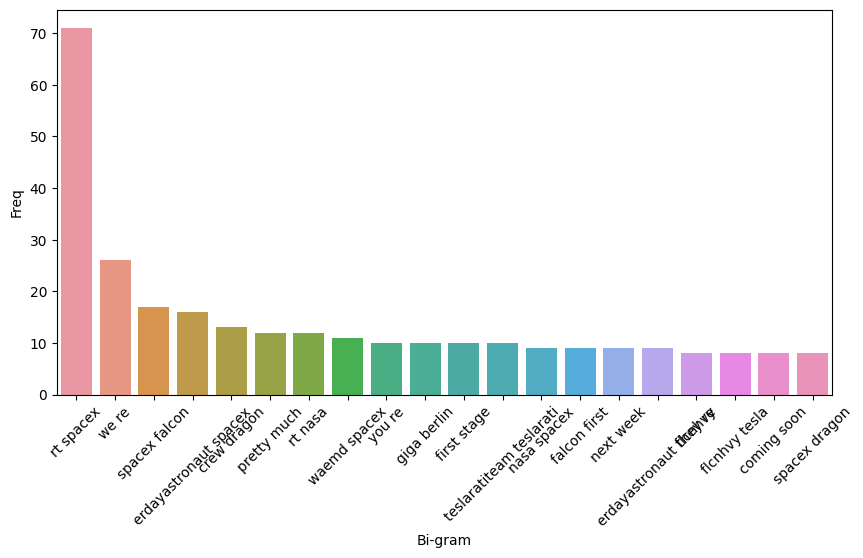

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

# Tri-gram

In [20]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [21]:
top3_words = get_top_n3_words(em["Tweet"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df.head()


,Tri-gram,Freq
0,rt spacex falcon,17
1,falcon first stage,9
2,spacex falcon first,8
3,thesheetztweetz waemd spacex,8
4,course still love,7


# Tri-gram plot


[Text(0, 0, 'rt spacex falcon'),
 Text(1, 0, 'falcon first stage'),
 Text(2, 0, 'spacex falcon first'),
 Text(3, 0, 'thesheetztweetz waemd spacex'),
 Text(4, 0, 'course still love'),
 Text(5, 0, 'ppathole thesheetztweetz waemd'),
 Text(6, 0, 'waemd spacex spacexstarlink'),
 Text(7, 0, 'first stage landed'),
 Text(8, 0, 'rt spacex liftoff'),
 Text(9, 0, 'spacex spacexstarlink wanationalguard'),
 Text(10, 0, 'spacex felixschlang marcushousegame'),
 Text(11, 0, 'still love droneship'),
 Text(12, 0, 'rt spacex dragon'),
 Text(13, 0, 'dragon first operational'),
 Text(14, 0, 'first operational mission'),
 Text(15, 0, 'casparstanley ercxspace marcushousegame'),
 Text(16, 0, 'ercxspace marcushousegame felixschlang'),
 Text(17, 0, 'erdayastronaut joshbickett ajtourville'),
 Text(18, 0, 'joshbickett ajtourville spacex'),
 Text(19, 0, 'spacex falcon launches')]

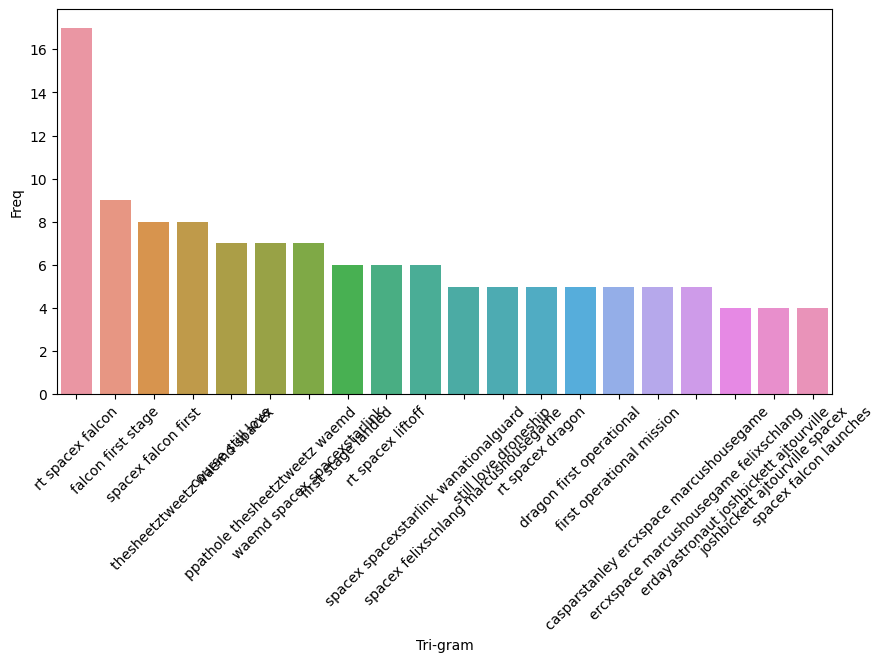

In [22]:
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])


# WordCloud¶


In [23]:
string_Total = " ".join(em["Tweet"])


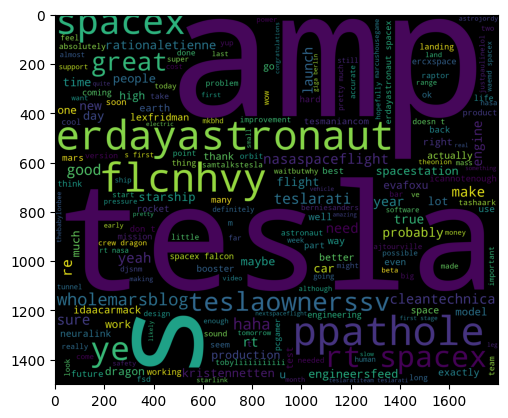

In [24]:
#wordcloud for entire corpus

from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

### Subjectivity and polarity 

The below code uses a package called TextBlob to perform sentiment analysis on a set of tweets. Sentiment analysis is a way to determine the overall emotion or sentiment expressed in a piece of text. In this case, the code analyzes the tweets in the "Tweet" column of a pandas DataFrame called "em" and calculates two measures of sentiment: subjectivity and polarity.

Subjectivity measures how opinionated or subjective the text is, on a scale from 0 to 1. A value of 0 means the text is completely objective (i.e., it contains no opinions or emotions), while a value of 1 means the text is completely subjective (i.e., it is all opinions and emotions).

Polarity measures the overall sentiment or tone of the text, on a scale from -1 to 1. A value of -1 means the text is very negative, a value of 0 means the text is neutral, and a value of 1 means the text is very positive.

The sentiment_analysis function uses TextBlob to calculate the subjectivity and polarity of each tweet, and then returns these values as a pandas Series. The apply method is then used to apply this function to each row of the "em" DataFrame, creating two new columns called "subjectivity" and "polarity". These columns contain the subjectivity and polarity measures for each tweet in the DataFrame.


In [25]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Tweet"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
em[["subjectivity", "polarity"]] = em.apply(sentiment_analysis, axis=1)

em

,Tweet,subjectivity,polarity
0,im alien,0.750000,-0.250000
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000,0.000000
2,joerogan spotify great interview,0.750000,0.800000
3,doge underestimated,0.000000,0.000000
4,teslacn congratulations tesla china amazing ex...,0.322222,0.200000
...,...,...,...
1994,flcnhvy true sounds surreal negative propagand...,0.508333,0.111111
1995,ppathole make sure read ur terms amp condition...,0.888889,0.500000
1996,teslagong ppathole samwise gamgee,0.000000,0.000000
1997,ppathole altho dumb dumber,0.500000,-0.375000


### Creating a worlcloud

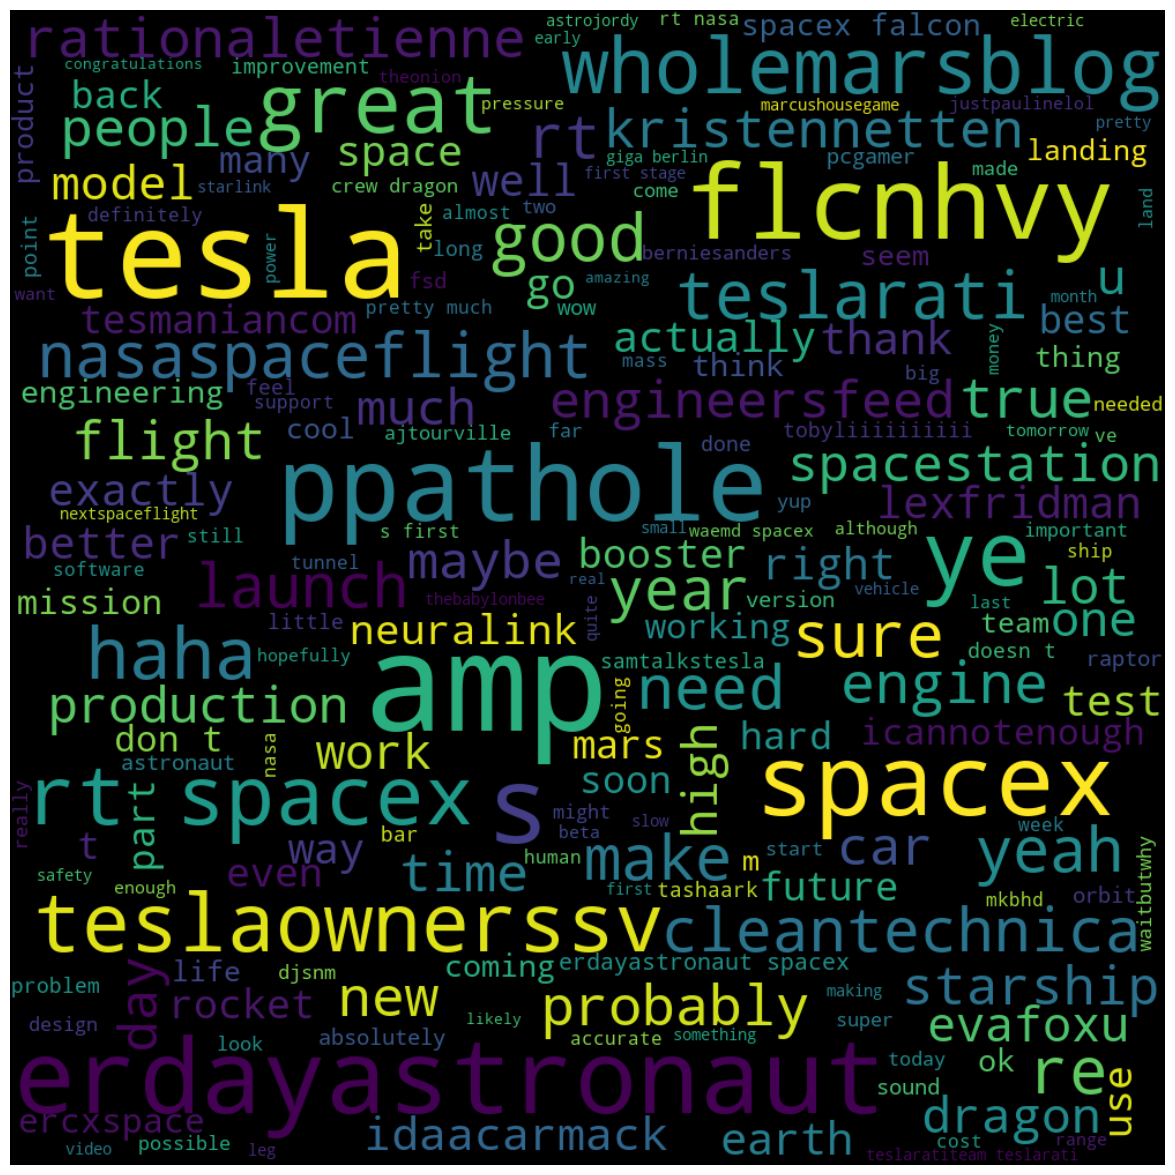

In [26]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([twts for twts in em["Tweet"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(15, 15), dpi=100)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [27]:
# Compute The Negative, Neutral, Positive Analysis

def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
em["analysis"] = em["polarity"].apply(analysis)

In [28]:
em

,Tweet,subjectivity,polarity,analysis
0,im alien,0.750000,-0.250000,Negative
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000,0.000000,Neutral
2,joerogan spotify great interview,0.750000,0.800000,Positive
3,doge underestimated,0.000000,0.000000,Neutral
4,teslacn congratulations tesla china amazing ex...,0.322222,0.200000,Positive
...,...,...,...,...
1994,flcnhvy true sounds surreal negative propagand...,0.508333,0.111111,Positive
1995,ppathole make sure read ur terms amp condition...,0.888889,0.500000,Positive
1996,teslagong ppathole samwise gamgee,0.000000,0.000000,Neutral
1997,ppathole altho dumb dumber,0.500000,-0.375000,Negative


In [29]:
#Classifying Positive and Negative Tweets

positive_tweets = em[em['analysis'] == 'Positive']
negative_tweets = em[em['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
  print(' -' + row['Tweet'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
  print(' -' + row['Tweet'])

positive tweets
 -joerogan spotify great interview
 -teslacn congratulations tesla china amazing execution last year next even
 -happy new year ox
 -owensparks flcnhvy haha thanks
 -entertaining outcome likely
negative tweets
 -im alien
 -frodo underdoge thought would fail httpstcozgxjfdzzrm
 -freewalletorg app sucks
 -rationaletienne adamklotz starlink staggeringly difficult technical amp economic endeavor however
 -rationaletienne adamklotz spacex needs pass deep chasm negative cash flow next year


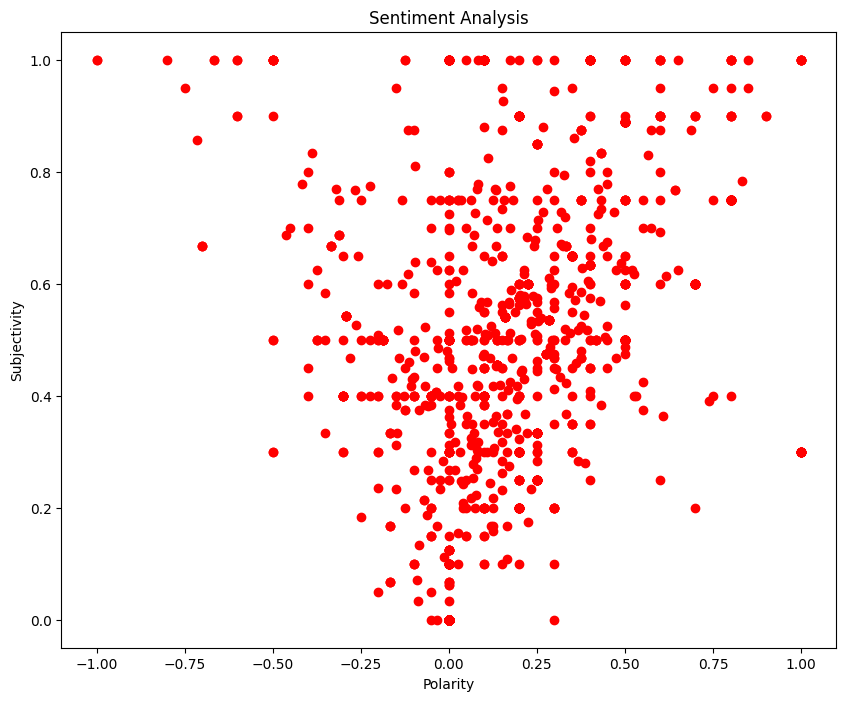

In [30]:
plt.figure(figsize=(10, 8))

for i in range(0, em.shape[0]):
    plt.scatter(em["polarity"][i], em["subjectivity"][i], color = "Red")

plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph

In [31]:
len(positive_tweets) / len(negative_tweets)

4.21608040201005

### Colclusion: Since that number is positive, and quite high of a ratio, we can also conclude that Elon Musk is a positive guy.